<a href="https://colab.research.google.com/github/leah0727/class_ai4dl/blob/main/3_27_chapter3%2C4_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**For two class classification model, try to visualize classification results at batch 5, 10, 15 and 20.**


질문1.
[chp3.] 1. For two class classification model, try to visualize classification results at batch 5, 10, 15 and 20.
이 문제에서 batch 사이즈를 크게 할수록 흩어진 정도가 달라지는 건가요? batch 사이즈에 따라서 뭐가 정확히 차이를 보이는 건지 ㅠㅠ 잘 모르겠습니다. 첨부 이미지 확인해주세요!

제가 표현을 잘못했네요 at epoch 5, 10, 15, 20 으로 했었어야하는데.. 데이터를 각각 5번, 10번, 15번, 20번 써서 모형의 weight parameter 를 업데이트 하라는 의미이고, 학습이 점점 진행됨에 따라서 모형이 점점 좋아지는 상황을 확인해보라는 의미의 문제였습니다. 첨부 이미지로는 맞게 잘 한것으로 보입니다.

### **batch =50**

**Generating two classes of random points in a 2D plane**

In [2]:
import numpy as np
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

In [3]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

NameError: name 'inputs' is not defined

**Creating the linear classifier variables**

In [4]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.6716
Loss at step 1: 0.2257
Loss at step 2: 0.1213
Loss at step 3: 0.1029
Loss at step 4: 0.0948
Loss at step 5: 0.0885
Loss at step 6: 0.0829
Loss at step 7: 0.0777
Loss at step 8: 0.0730
Loss at step 9: 0.0687
Loss at step 10: 0.0648
Loss at step 11: 0.0613
Loss at step 12: 0.0580
Loss at step 13: 0.0551
Loss at step 14: 0.0524
Loss at step 15: 0.0499
Loss at step 16: 0.0477
Loss at step 17: 0.0456
Loss at step 18: 0.0438
Loss at step 19: 0.0421
Loss at step 20: 0.0405
Loss at step 21: 0.0391
Loss at step 22: 0.0378
Loss at step 23: 0.0366
Loss at step 24: 0.0356
Loss at step 25: 0.0346
Loss at step 26: 0.0337
Loss at step 27: 0.0329
Loss at step 28: 0.0322
Loss at step 29: 0.0315
Loss at step 30: 0.0309
Loss at step 31: 0.0303
Loss at step 32: 0.0298
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0285
Loss at step 36: 0.0282
Loss at step 37: 0.0278
Loss at step 38: 0.0275
Loss at step 39: 0.0273
Loss at step 40: 0.0270
Loss at step 41: 0.0268
Lo

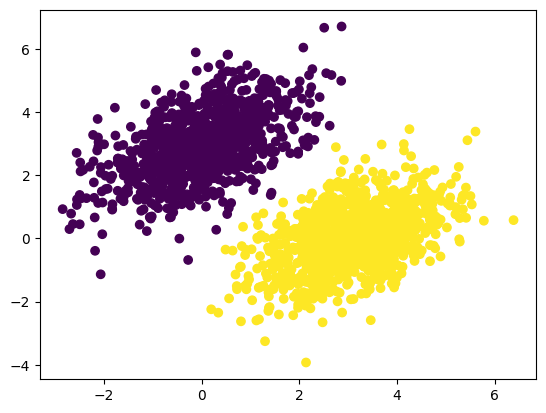

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

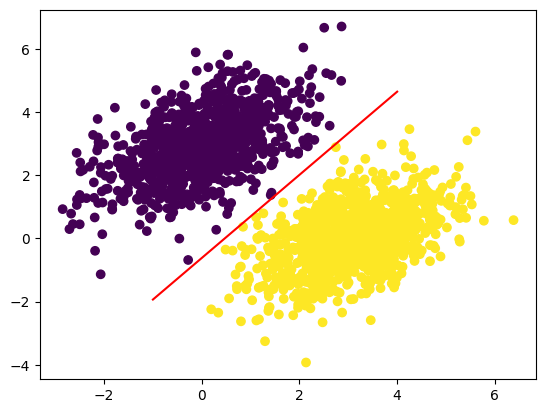

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---



### **batch =5**

**Generating two classes of random points in a 2D plane**

In [ ]:
import numpy as np
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

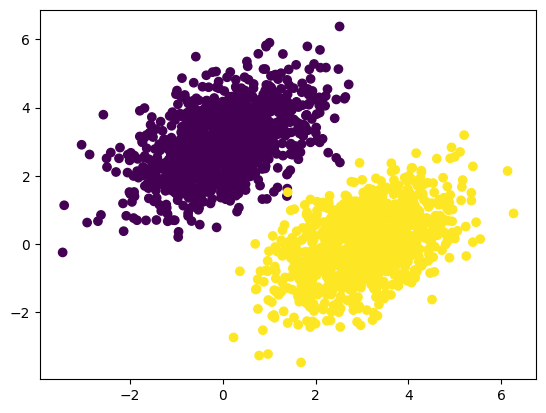

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(5):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9204
Loss at step 1: 0.2030
Loss at step 2: 0.1122
Loss at step 3: 0.0958
Loss at step 4: 0.0888


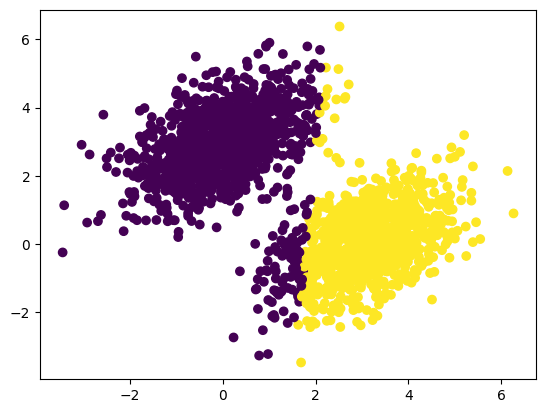

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

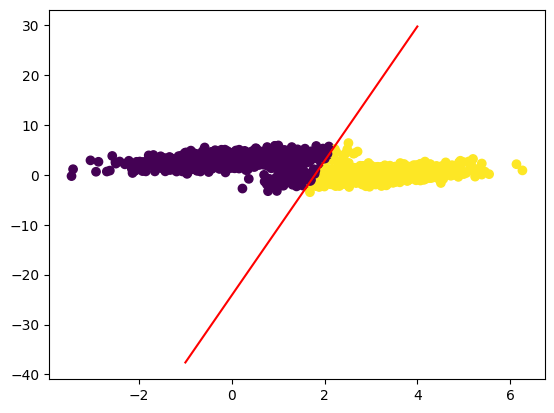

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---



### **batch =10**

**Generating two classes of random points in a 2D plane**

In [ ]:
import numpy as np
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

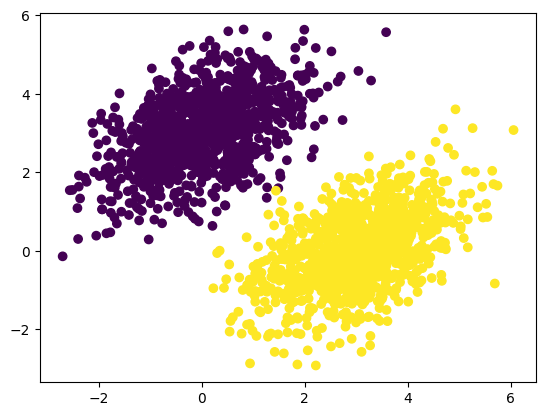

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(10):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.1531
Loss at step 1: 0.2675
Loss at step 2: 0.1273
Loss at step 3: 0.1029
Loss at step 4: 0.0944
Loss at step 5: 0.0883
Loss at step 6: 0.0831
Loss at step 7: 0.0782
Loss at step 8: 0.0738
Loss at step 9: 0.0698


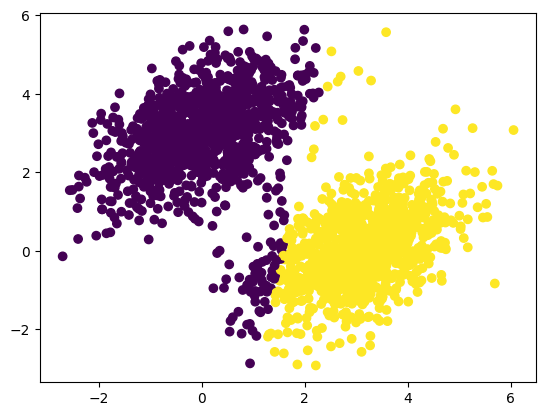

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

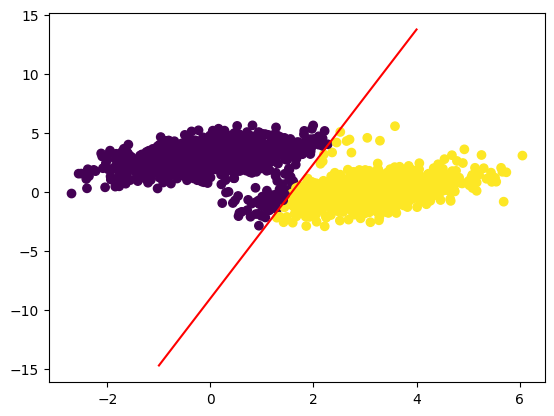

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---



### **batch =15**

**Generating two classes of random points in a 2D plane**

In [ ]:
import numpy as np
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

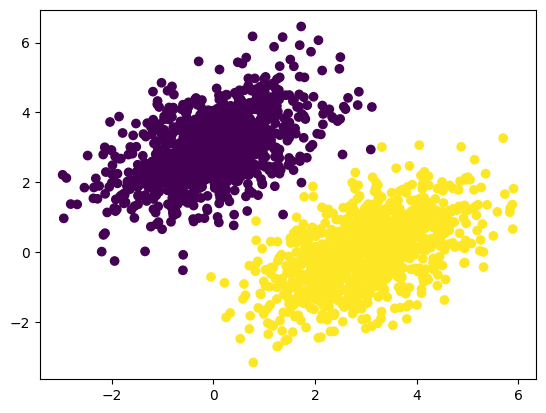

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(15):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.4346
Loss at step 1: 0.7085
Loss at step 2: 0.2192
Loss at step 3: 0.1516
Loss at step 4: 0.1346
Loss at step 5: 0.1243
Loss at step 6: 0.1156
Loss at step 7: 0.1076
Loss at step 8: 0.1004
Loss at step 9: 0.0938
Loss at step 10: 0.0878
Loss at step 11: 0.0823
Loss at step 12: 0.0772
Loss at step 13: 0.0726
Loss at step 14: 0.0684


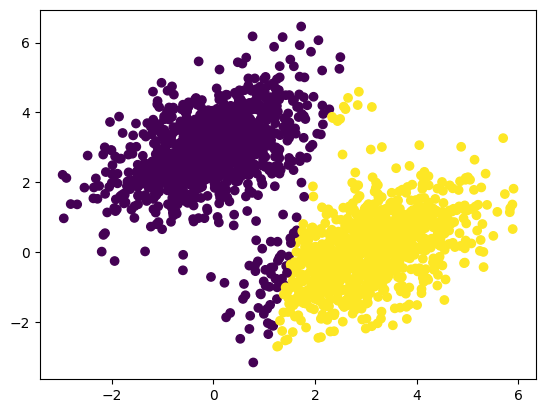

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

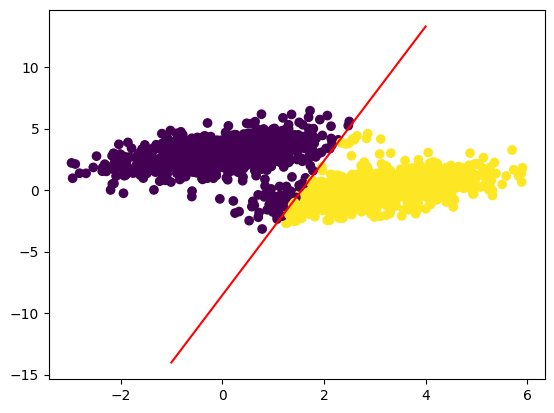

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---



### **batch =20**

**Generating two classes of random points in a 2D plane**

In [ ]:
import numpy as np
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

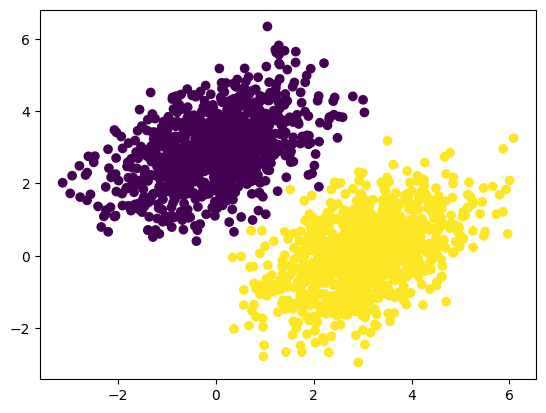

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(20):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.9533
Loss at step 1: 0.5088
Loss at step 2: 0.1776
Loss at step 3: 0.1264
Loss at step 4: 0.1130
Loss at step 5: 0.1050
Loss at step 6: 0.0984
Loss at step 7: 0.0923
Loss at step 8: 0.0868
Loss at step 9: 0.0817
Loss at step 10: 0.0771
Loss at step 11: 0.0728
Loss at step 12: 0.0689
Loss at step 13: 0.0653
Loss at step 14: 0.0621
Loss at step 15: 0.0590
Loss at step 16: 0.0563
Loss at step 17: 0.0538
Loss at step 18: 0.0514
Loss at step 19: 0.0493


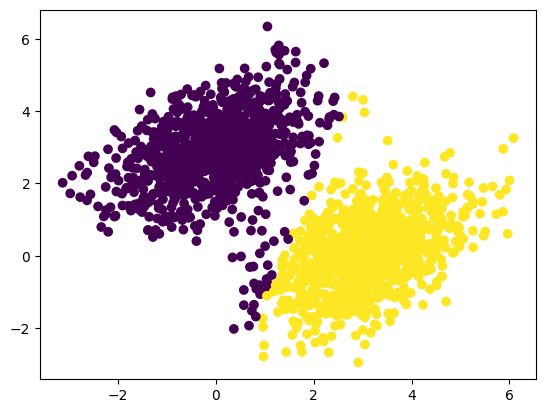

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

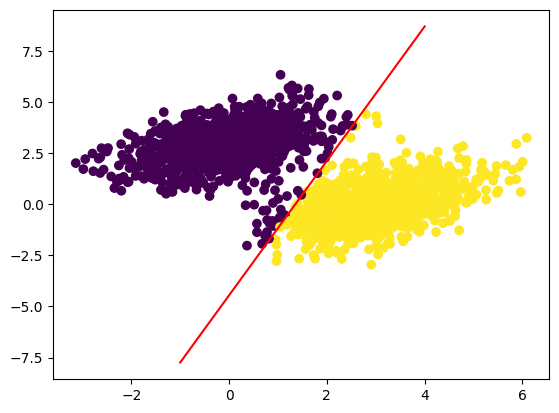

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---



## **Try to modify your linear classifier not using bias term (b). Try to fit your model, what happens?**

**Generating two classes of random points in a 2D plane**

In [5]:
num_samples_per_class = 1000 #1000개 포인트 만들어
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [7]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [8]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

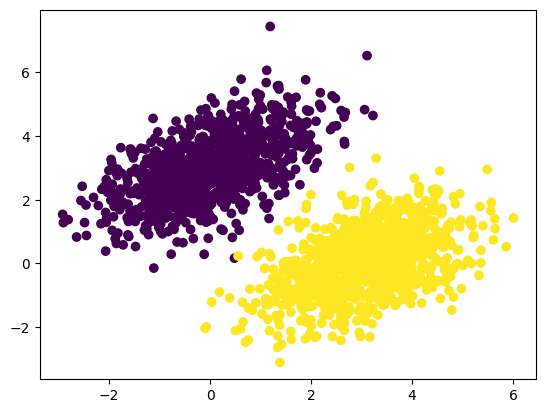

In [9]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [10]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
#b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [13]:
def model(inputs):
    return tf.matmul(inputs, W) #+b 빼

**The mean squared error loss function**

In [14]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [15]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    #grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    grad_loss_wrt_W = tape.gradient(loss, W )
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    #b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [16]:
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.6697
Loss at step 1: 0.1152
Loss at step 2: 0.0858
Loss at step 3: 0.0841
Loss at step 4: 0.0840
Loss at step 5: 0.0840
Loss at step 6: 0.0840
Loss at step 7: 0.0840
Loss at step 8: 0.0840
Loss at step 9: 0.0840
Loss at step 10: 0.0840
Loss at step 11: 0.0840
Loss at step 12: 0.0840
Loss at step 13: 0.0840
Loss at step 14: 0.0840
Loss at step 15: 0.0840
Loss at step 16: 0.0840
Loss at step 17: 0.0840
Loss at step 18: 0.0840
Loss at step 19: 0.0840
Loss at step 20: 0.0840
Loss at step 21: 0.0840
Loss at step 22: 0.0840
Loss at step 23: 0.0840
Loss at step 24: 0.0840
Loss at step 25: 0.0840
Loss at step 26: 0.0840
Loss at step 27: 0.0840
Loss at step 28: 0.0840
Loss at step 29: 0.0840
Loss at step 30: 0.0840
Loss at step 31: 0.0840
Loss at step 32: 0.0840
Loss at step 33: 0.0840
Loss at step 34: 0.0840
Loss at step 35: 0.0840
Loss at step 36: 0.0840
Loss at step 37: 0.0840
Loss at step 38: 0.0840
Loss at step 39: 0.0840
Loss at step 40: 0.0840
Loss at step 41: 0.0840
Lo

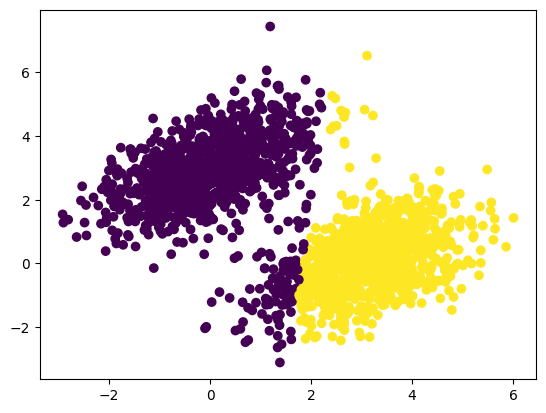

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

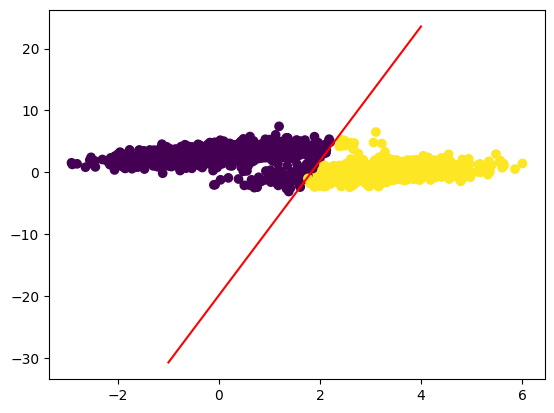

In [18]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



---
# **chp4.**


- Try fitting logistic regression, and check validation loss and accuracy.

- Try using one or three hidden layers, and check validation loss and accuracy.

- Try using layers with more hidden units or fewer hidden unit.

- Try using the mseloss function instead of binary_crossentropy.

- Try using the tanhactivation instead of relu.



4.2
- Solve the same problem without using one-hot encoding y variable.  *

- Try using larger or smaller layers.

- Try using a single hidden layer, or three hidden layers.




---

# **Try fitting logistic regression, and check validation loss and accuracy.**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
len(train_data[0]) #데이터마다 len 다름 #dimension 같게 해줘야함

218

In [ ]:
len(train_data[1])

189

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #10000개 word
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0] #vectorize

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
# Try fitting logistic regression, and check validation loss and accuracy.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Try using one or three hidden layers, and check validation loss and accuracy.
# Dense Layer 를 더 추가하거나 빼보라는 의미였습니다. 시험문제 낼 때에는 더 명확하게 표현하도록 할게요.

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    #layers.Dense(16, activation="relu"),
    #layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Try using layers with more hidden units or fewer hidden unit.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #16 hidden units
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Try using the tanhactivation instead of relu.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss= "binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
#Try using the mseloss function instead of binary_crossentropy.
model.compile(optimizer="rmsprop",
              loss= "mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.2141 - accuracy: 0.7478 - val_loss: 0.1909 - val_accuracy: 0.7949
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1705 - accuracy: 0.8476 - val_loss: 0.1631 - val_accuracy: 0.8394
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1454 - accuracy: 0.8743 - val_loss: 0.1445 - val_accuracy: 0.8586
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1279 - accuracy: 0.8876 - val_loss: 0.1327 - val_accuracy: 0.8627
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1151 - accuracy: 0.8980 - val_loss: 0.1227 - val_accuracy: 0.8730
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1052 - accuracy: 0.9045 - val_loss: 0.1160 - val_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0975 - accuracy: 0.9122 - val_loss: 0.1106 - val_accuracy: 0.8799
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

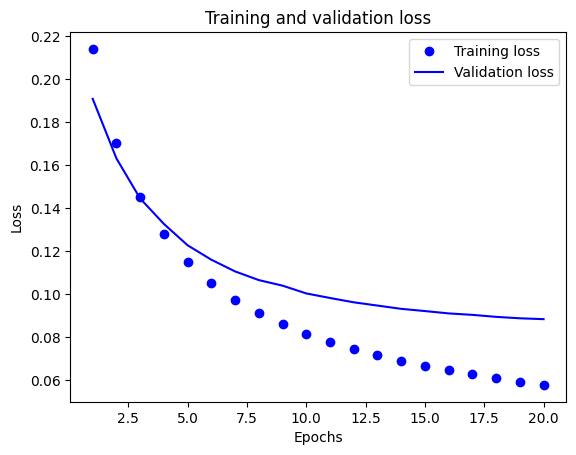

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() #epoch 4일 떄가 효율적 #valdiation loss 올라가기 전에

**Plotting the training and validation accuracy**

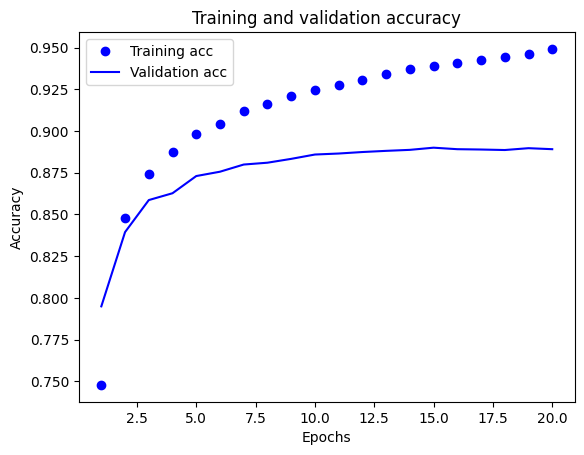

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 4.2 **Solve the same problem without using one-hot encoding y variable.**

문제에서 one-hot encoding 과정을 빼고 decoding 해준 뒤에
model definition 하고
compiling the model 단계에서
abel을 변형을 해주지 않았으니까 (원핫 인코딩을 하지 않았으므로) categorical crossentropy를 이 경우에는 쓰지 않고 sparse_categorical_crossentropy 를 써야 하는 건가요? ?

-> 네 맞습니다. 그렇게 해주고, 데이터를 validation set 나눠주는 코드 돌리고 모형 적합시키는 코드 돌리면 그대로 잘 돌아갈 겁니다.

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Encoding the labels**

In [ ]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [ ]:
y_train

array([ 3.,  4.,  3., ..., 25.,  3., 25.], dtype=float32)

In [ ]:
y_train[:10]

array([ 3.,  4.,  3.,  4.,  4.,  4.,  4.,  3.,  3., 16.], dtype=float32)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #질문 - vs. categorical _Cross는 바꿔줬을 떄 쓰는
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.7593 - accuracy: 0.4520 - val_loss: 1.8465 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.5503 - accuracy: 0.6765 - val_loss: 1.3853 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 1.1889 - accuracy: 0.7419 - val_loss: 1.1899 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 2s 111ms/step - loss: 0.9677 - accuracy: 0.7948 - val_loss: 1.0971 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 2s 104ms/step - loss: 0.8046 - accuracy: 0.8279 - val_loss: 0.9863 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 88ms/step - loss: 0.6708 - accuracy: 0.8542 - val_loss: 0.9422 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 3s 171ms/step - loss: 0.5659 - accuracy: 0.8772 - val_loss: 0.8884 - val_accuracy: 0.8110
Epoch 8/20

**Plotting the training and validation loss**

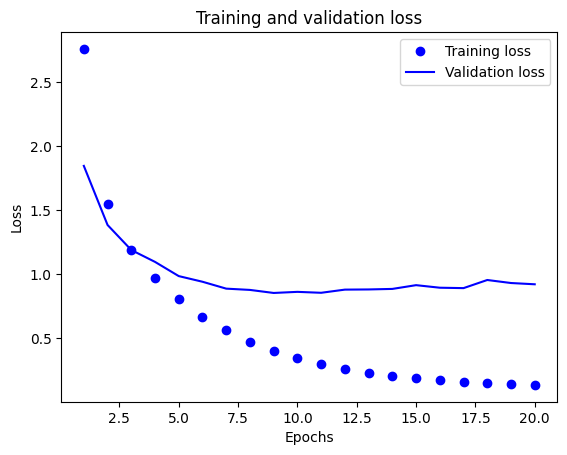

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

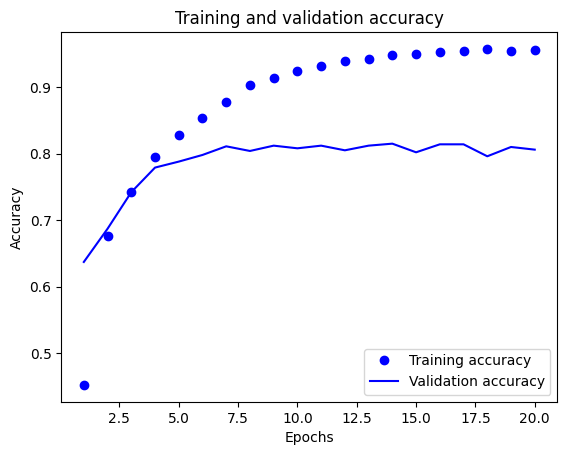

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()